# Raypath-based Radar Sounder Sim

In [1]:
# imports
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from surface import *
from source import *
from simulator import *
from focus import *

GPU's detected. Enabling CUDA compute


## 1: Point Target in Subsurface

| Transit | Traces | Altitude | Target Depth | Polarization | f₀ | Power |
|---------|--------|----------|---------------|--------------|----------|-----------|
| 30 km   | 300    | 25 km    | 1 km          | h            | 9 MHz    | 11.75 W   |

| Subsurface Gain | Surface Gain | Rx Opening | Rx Window | Rx Sampling | ε₁ | ε₂  | σ₁ | σ₂       |
|------------------|---------------|------------|------------|--------------|----|-----|-----|-----------|
| 80 dB            | 64 dB         | 20 km      | 30 km      | 48 MHz       | 1  | 3.15 | 0 S | 10⁻⁶ S   |


In [2]:
# create surface
surf = Surface(origin=(4000, 4000), dims=(400, 400), fs=5, overlap=0)
surf.gen_flat(0)

In [3]:
# generate linspace of sources
ss = source_linspace('x', -10e3, 20e3, 5050, 25e3, 500, 9e6, 1e6)

# target location
t = (5000, 5050, -500)   # target location (x, y, z)

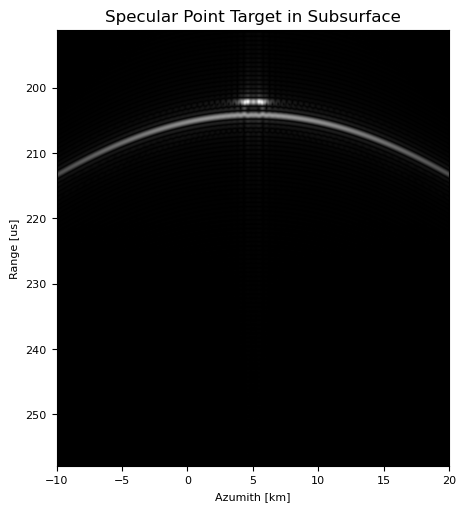

In [4]:
rdrgrm, time = run_sim_ms(surf, ss, t, reflect=True, polarization='v', sltrng=False)

## 2: Point target response function
*Function is a gaussian where $\sigma=3\degree$*

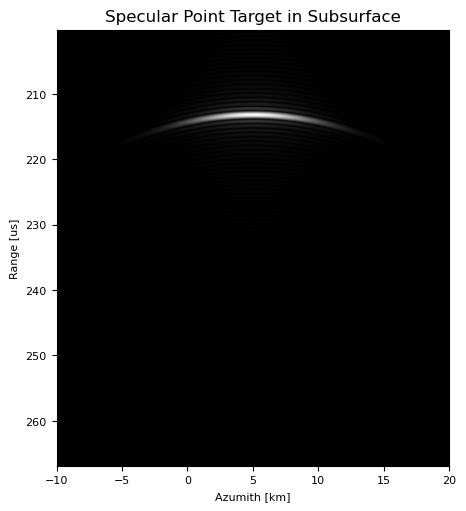

In [5]:
rdrgrm, time = run_sim_ms(surf, ss, t, reflect=False, polarization='v', sltrng=False, pt_response="gaussian")

## Sinusoid Surface

In [6]:
# define sinusoidal surface
surf = Surface(origin=(4000, 4000), dims=(400, 400), fs=5, overlap=0)

amp = 10    # amplitude [m]
per = 20    # periods   [m]
z   = 0     # center z  [m]
surf.gen_sin('x', amp, per, z)

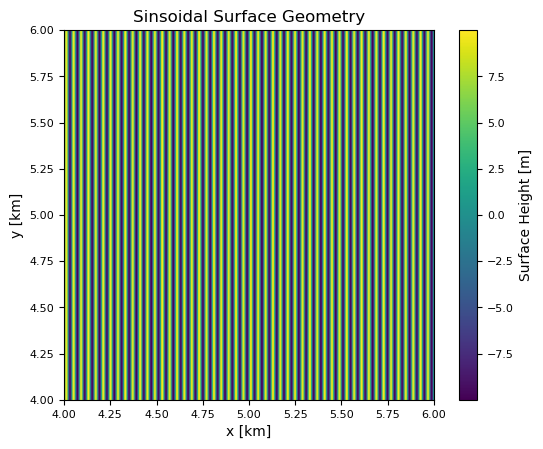

In [7]:
# plot surface
plt.imshow(surf.zs, origin="lower", extent=(4, 6, 4, 6))
cb = plt.colorbar(label="Surface Height [m]")
cb.ax.tick_params(labelsize=8)
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.tick_params(labelsize=8)
plt.title("Sinsoidal Surface Geometry")
plt.show()

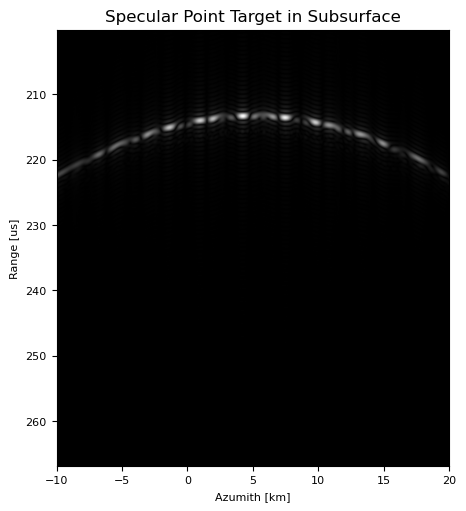

In [8]:
rdrgrm, time = run_sim_ms(surf, ss, t, reflect=False, polarization='v', sltrng=False)